# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [19]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('pickles/corpus.pkl')
data

,transcript,full_name
AnaA,what an excellent film by rian johnson defini...,Ana de Armas
SophiaL,am i the only one who felt that way do not get...,Sophia Lillis
LindseyM,first off i enjoyed season of the season...,Lindsey Morgan
JeriR,sorry I have gotta go with the negative nerds...,Jeri Ryan
TeresaP,we knew already that mel gibson is a filmmaker...,Teresa Palmer


In [20]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
AnaA,what an excellent film by rian johnson defini...,Ana de Armas,0.143654,0.535367
SophiaL,am i the only one who felt that way do not get...,Sophia Lillis,0.074038,0.544803
LindseyM,first off i enjoyed season of the season...,Lindsey Morgan,0.137204,0.539544
JeriR,sorry I have gotta go with the negative nerds...,Jeri Ryan,0.119261,0.517717
TeresaP,we knew already that mel gibson is a filmmaker...,Teresa Palmer,0.087673,0.528272


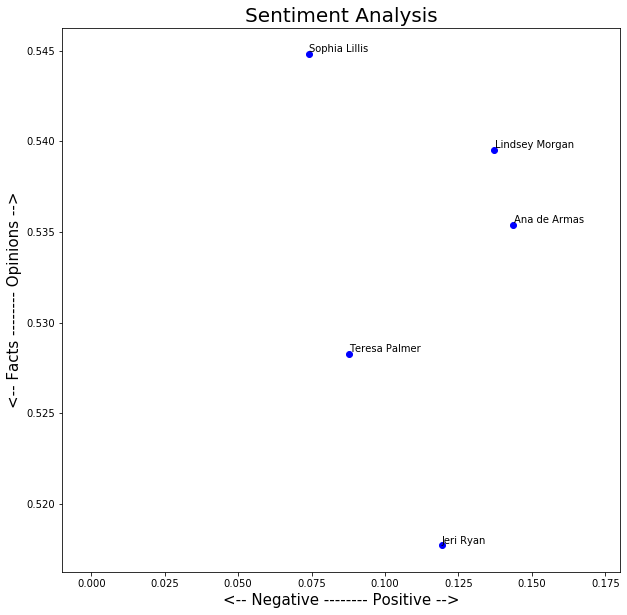

In [30]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, actor in enumerate(data.index):
    x = data.polarity.loc[actor]
    y = data.subjectivity.loc[actor]
    plt.scatter(x, y, color='blue')
    plt.text(x+.0001, y+.0001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .18) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [31]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [32]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
AnaA,what an excellent film by rian johnson defini...,Ana de Armas,0.143654,0.535367
SophiaL,am i the only one who felt that way do not get...,Sophia Lillis,0.074038,0.544803
LindseyM,first off i enjoyed season of the season...,Lindsey Morgan,0.137204,0.539544
JeriR,sorry I have gotta go with the negative nerds...,Jeri Ryan,0.119261,0.517717
TeresaP,we knew already that mel gibson is a filmmaker...,Teresa Palmer,0.087673,0.528272


In [33]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['what an excellent film by rian johnson  definitely feels like the film he was destined to make  writing that is slick as hell  sublime performances  most notably daniel craig who brings his a game in a wonderfully charismatic turn   superb editing and wonderfully atmospheric music   all tied together by masterful direction  will probably be among the most fun you have at a theatre this year and fans of agatha christie and old murder mystery stories will have plenty to love here   a nostalgically entertaining time  nothing was typical about this  everything was beautifully done in this movie  the story  the flow  the scenario  everything i highly recommend it for mystery lovers  for anyone who wants to watch a good movie  this is a movie one would not regret spending money on  after a long time i am rating a movie perfect   and this movie totally deserves it  i really like the subtle comedy sprinkled in the movie  it easies out the tense atmosphere  in a good detective movie  you exp

In [34]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [35]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [37]:
list_pieces[1]

['am i the only one who felt that way do not get me wrong  this series is really entertaining and witty  but it just felt like the intro to the story itself binge watching is done easily and quickly with seven   minutes episodes on average which just felt like   at the most or a   minutes movie at the end i just asked myself  why they did not go on so that the story gets told   could not they finish in time  that has   that is the only reason  i just gave it   stars  now we have to wait up to a year for the continuation everything else was really good  great show for someone who has grown up with stephen king stories  carrie and breakfast club  building up the characters takes time  and i see that some other viewers think it is too slow   but i like the story been build up from layer to layer  nice start for an interesting story    and great work from young stars  bingeworthy perfect length   episodes   strong performances   with a cliffhanger which makes me want season   right now   i

In [38]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.19544520486429207,
  0.11166914486479701,
  0.11005412917855312,
  -0.004024582048775589,
  0.13434880106973132,
  0.11800948675948675,
  0.22485409110409119,
  0.23491031872610801,
  0.17908769158769167,
  0.10535125619427949],
 [0.15022604664761527,
  0.025528699370804625,
  0.03481887160458586,
  0.0650361930998295,
  0.0847971647134827,
  0.04981971824103297,
  0.018791273363388743,
  0.03959663463876946,
  0.1416302837962757,
  0.11932398619898621],
 [0.1293100133992991,
  0.08116810107881532,
  0.20302325469888757,
  0.1958736243676002,
  0.12602196364057677,
  0.07906602639965954,
  0.20156777556777558,
  0.14745020296422173,
  0.10139862679078365,
  0.09170609490691455],
 [-0.001426050522436054,
  0.09127606746994499,
  0.11265975081828745,
  0.16565857727567762,
  0.11081394103228166,
  0.10223839135891251,
  0.03264101010101011,
  0.20741354272205328,
  0.15044039023042935,
  0.21915085353820535],
 [0.12766480361441615,
  0.0769042902909898,
  0.15816971838887423,
  0.116

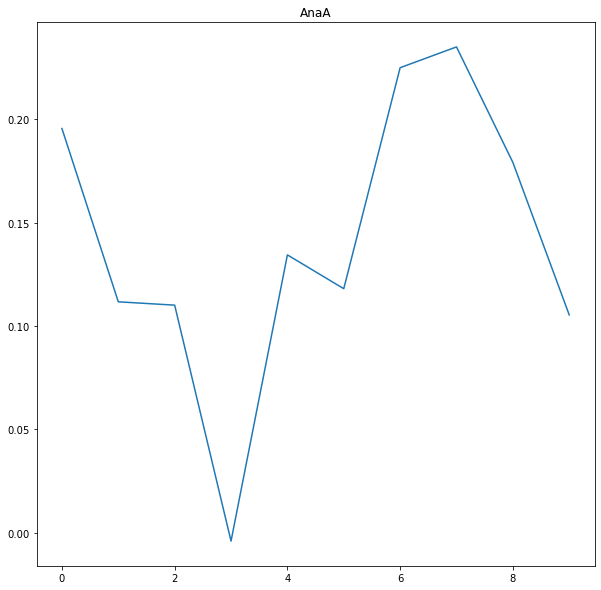

In [39]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

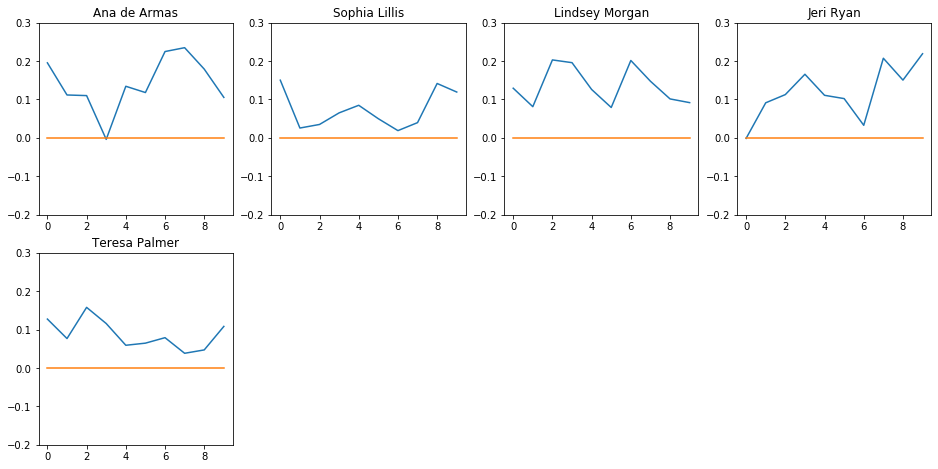

In [40]:
# Show the plot for all actors
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Teresa Palmer stays generally positive throughout her routine. Similar actors are Lindsey Morgan and Sophia Lillis

Ana de Armas, participate in movies that had neutral opinion, Sophia Lilis got reviews that changed abruptaly over the movies.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.